# **About Dataset**
Data description
There are 3 types of input features:

Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.
Features:

Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
All of the dataset values were collected at the moment of medical examination.

In [53]:
# Importing Liberies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [83]:
# Generate synthetic data
np.random.seed(42)
x = np.random.rand(1000, 3) * 100  # Features: size, number of rooms, age
y = (x[:, 0] * 0.5 + x[:, 1] * 0.3 - x[:, 2] * 0.1 + np.random.randn(1000) * 10)  # Target: price

# Create a DataFrame for easier visualization
df = pd.DataFrame(x, columns=['Size', 'Rooms', 'Age'])
df['Price'] = y
y

array([ 5.05278596e+01,  3.92235977e+01,  2.97140081e+01,  1.26625081e+01,
        5.82934955e+01,  1.56624338e+01,  2.05228248e+01,  1.35092987e+01,
        2.65996879e+01,  4.71061830e+01,  2.45487353e+01,  5.48025615e+01,
       -3.90507025e+00,  3.18438864e+01,  2.01186044e+01,  5.26140434e+01,
        1.78272867e+01,  4.09197563e+01,  4.55010566e+01,  2.02607747e+01,
        1.77279786e+01,  1.53558678e+01,  3.19667965e+01,  7.55423605e+01,
        2.88453634e+01,  7.33330146e+01,  9.17063750e+00,  2.71957867e+01,
        1.38739024e+01,  5.63749117e+01,  1.01316162e+01,  3.66834102e+01,
        4.21465596e+01, -5.13180708e-01,  2.22272250e+01,  9.63563442e+00,
        8.54778390e+00,  1.86284587e+01,  5.86792689e+01,  4.10643438e+01,
        4.56128334e+01, -1.22553539e+00,  5.16878419e+01,  2.93383778e+01,
        5.85824677e+00,  1.01972235e+01,  2.84918715e+01,  1.44582131e+01,
        1.13256631e+01,  2.45852924e+01,  4.39338268e+01,  5.33898076e+01,
        4.86121895e+01,  

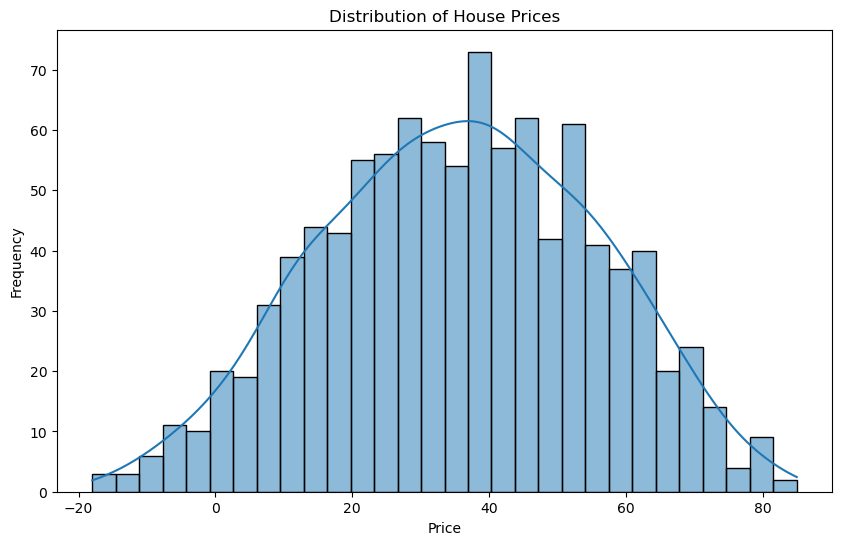

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

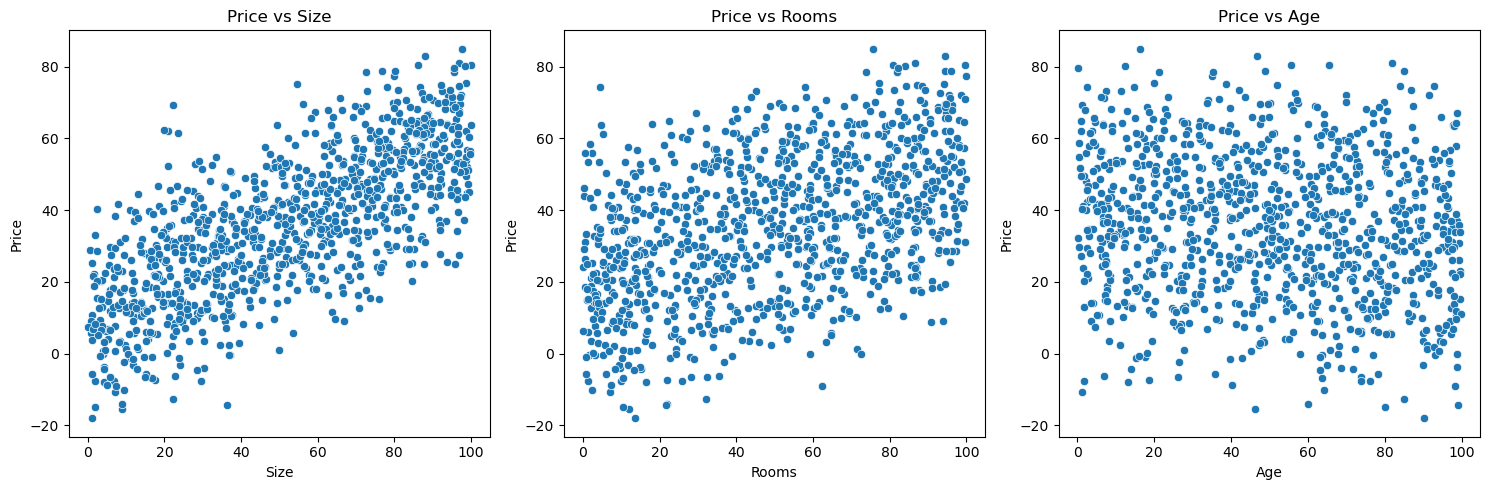

In [87]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Size', y='Price', data=df)
plt.title('Price vs Size')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Rooms', y='Price', data=df)
plt.title('Price vs Rooms')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Age', y='Price', data=df)
plt.title('Price vs Age')

plt.tight_layout()
plt.show()

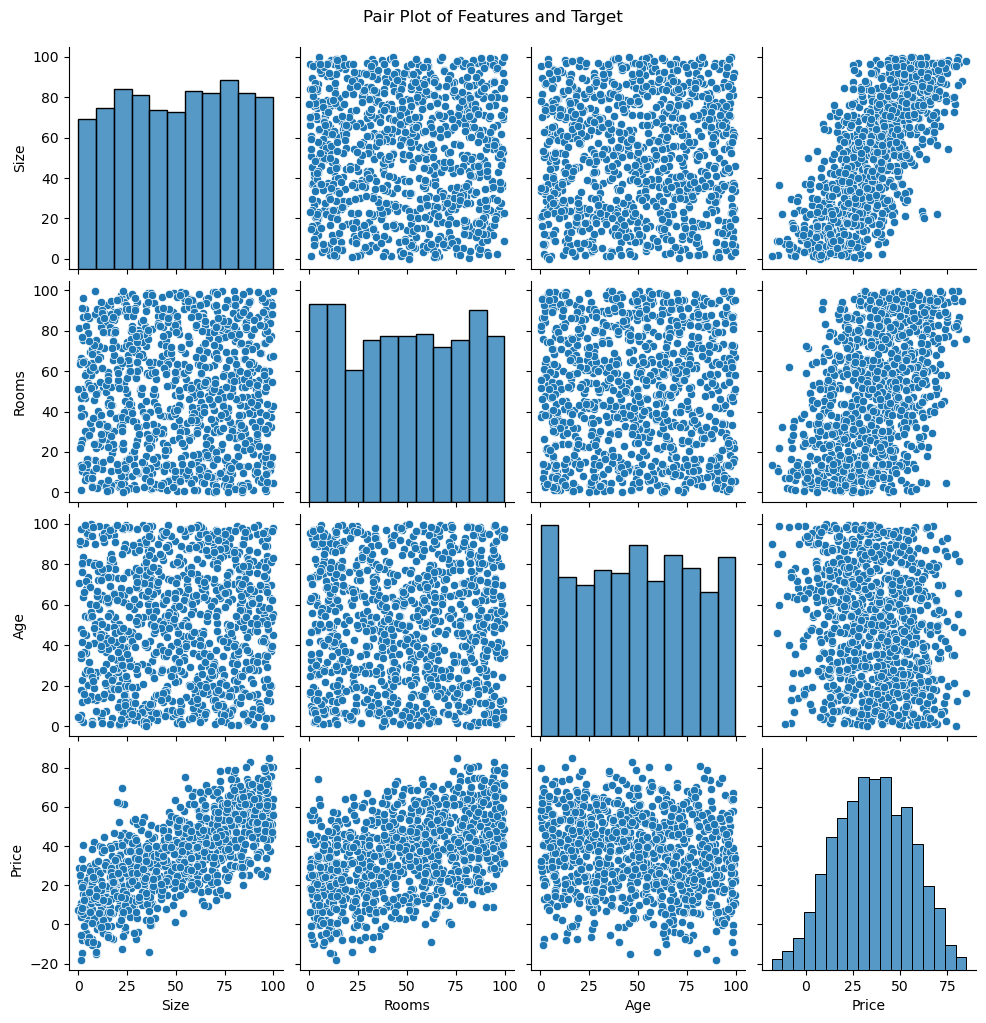

In [89]:
sns.pairplot(df)
plt.suptitle('Pair Plot of Features and Target', y=1.02)
plt.show()

In [62]:
# Test and Train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:
# Initiate Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR()
}

r2_scores = {}
predictions = {}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred
    r2 = r2_score(y_test, y_pred)
    r2_scores[model_name] = r2
    print(f"{model_name} R² Score: {r2:.4f}")

Linear Regression R² Score: 0.7510
Decision Tree R² Score: 0.4277
Random Forest R² Score: 0.7200
Support Vector Regressor R² Score: 0.7036


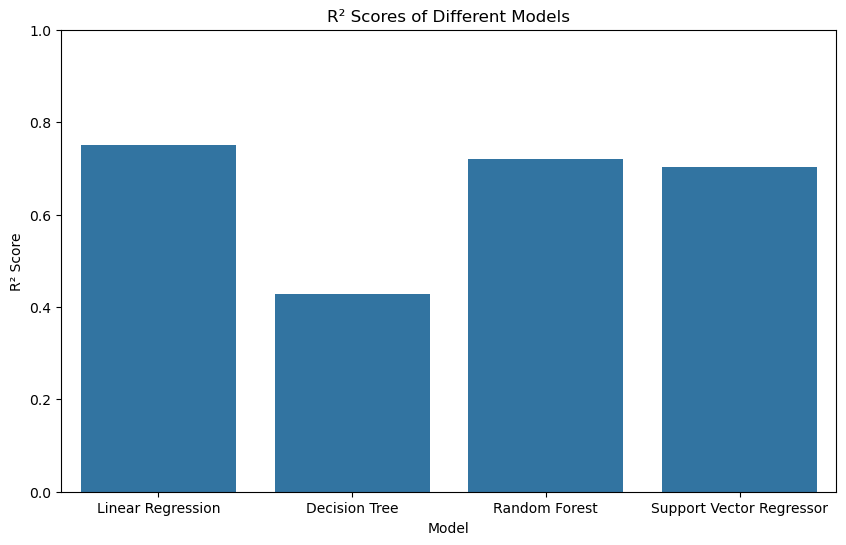

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()))
plt.title('R² Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.show()

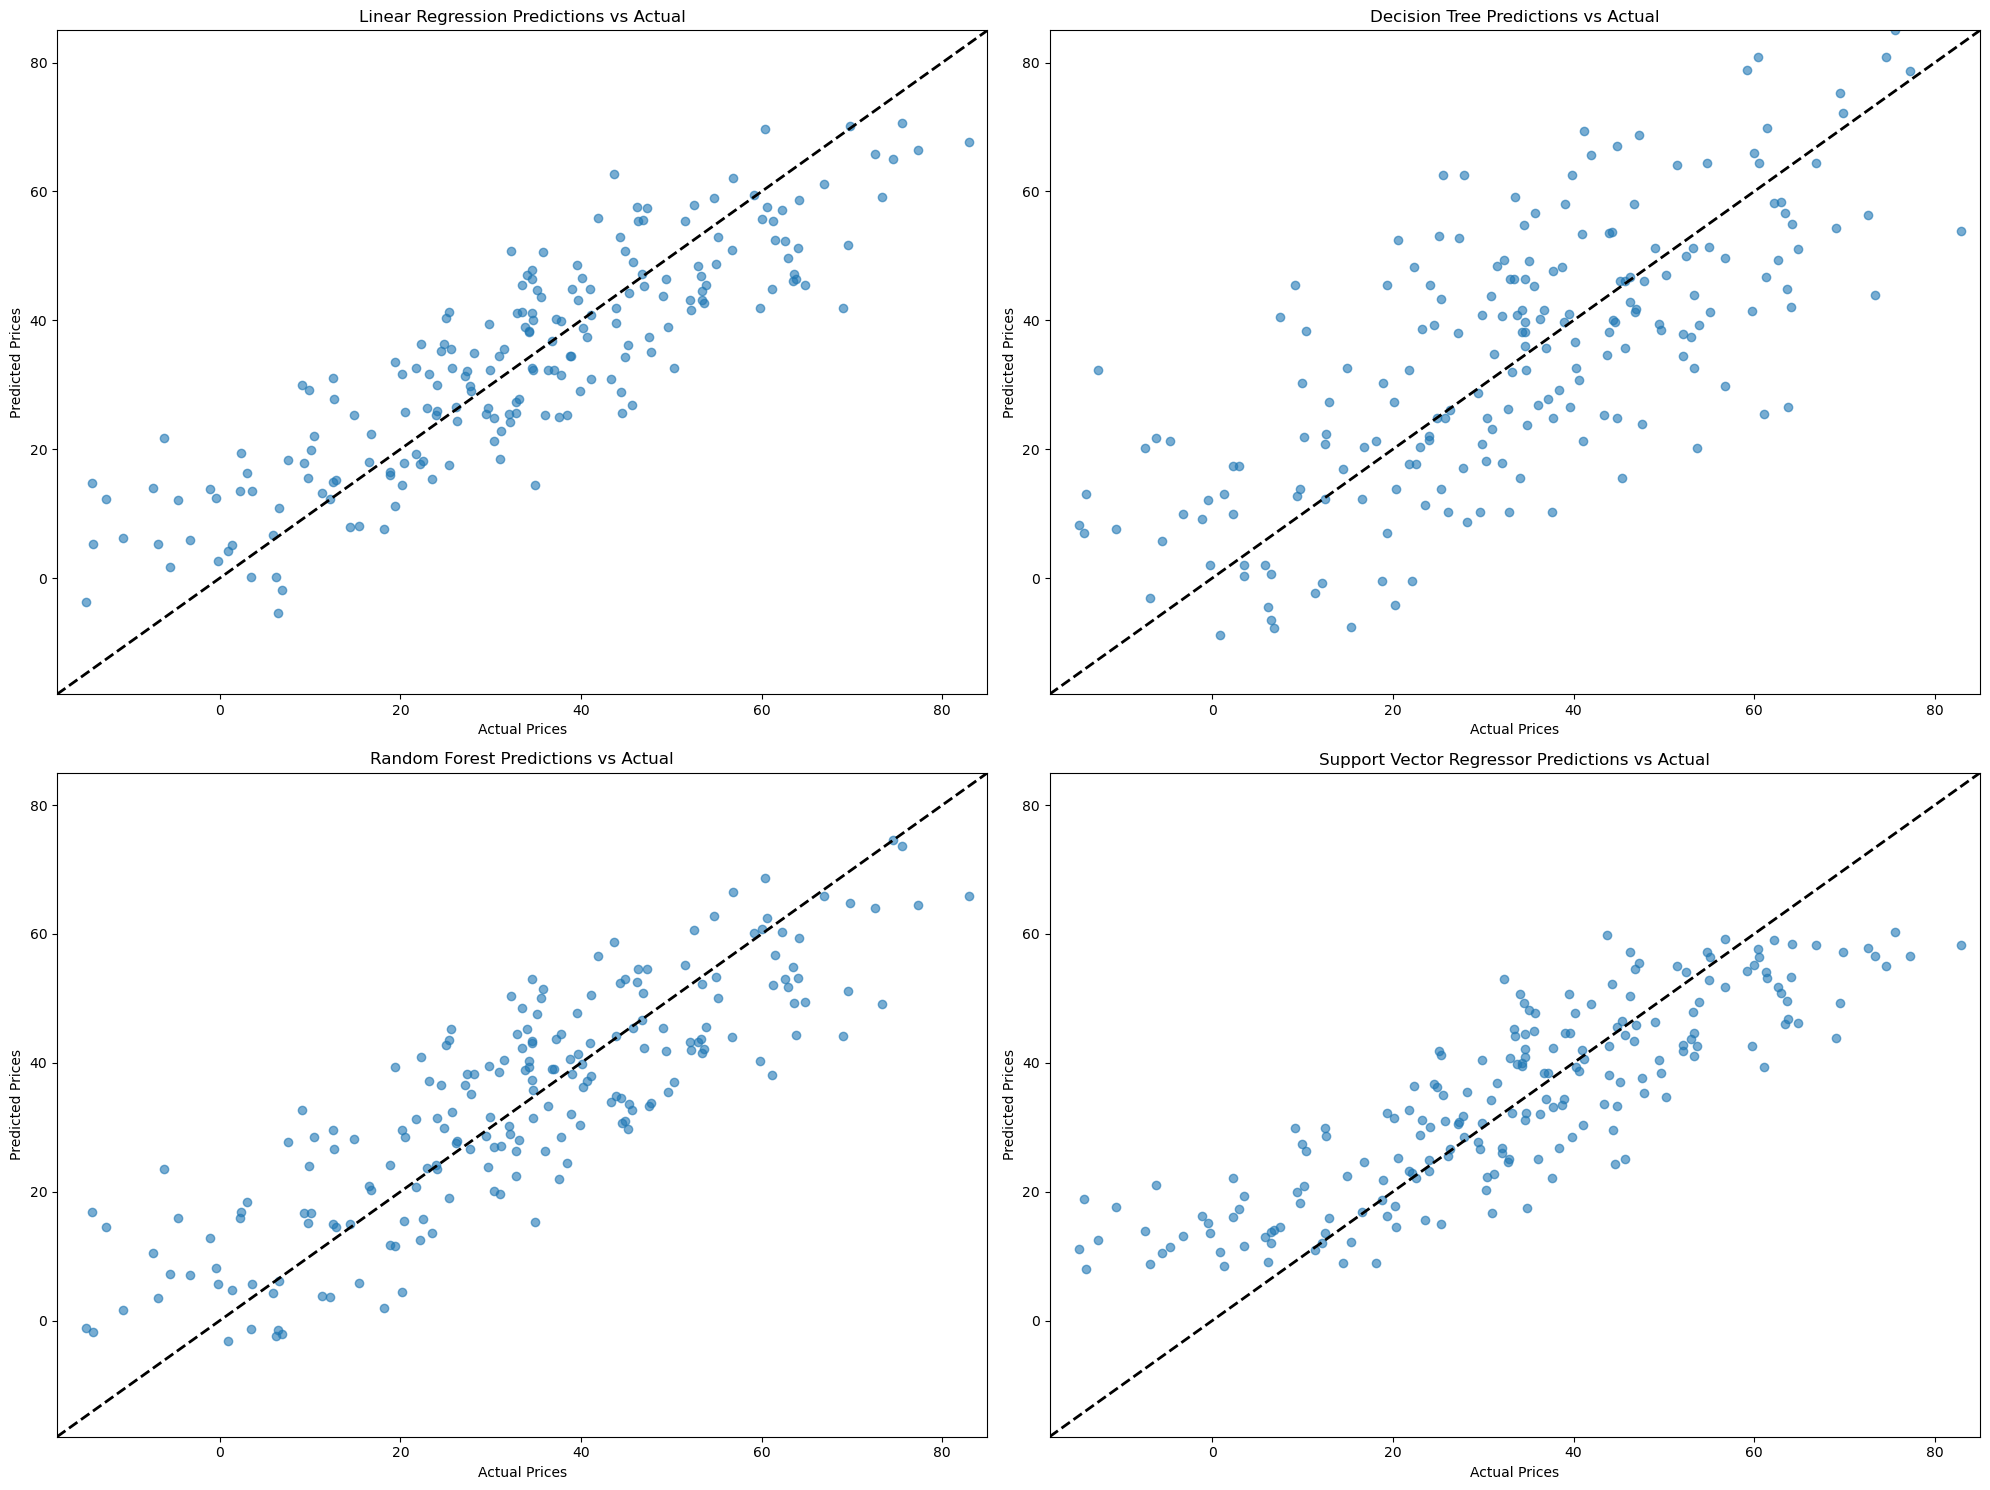

In [65]:
plt.figure(figsize=(20, 15))

for i, (model_name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.title(f'{model_name} Predictions vs Actual')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.xlim(y.min(), y.max())
    plt.ylim(y.min(), y.max())

plt.tight_layout()
plt.show()

## ***Accuracy of Models are:***

### ***Linear Regression = 75%***

### ***Decision Tree = 42%***

### ***Random Forest = 72%***

### ***Support Vector Regressor = 70%***